In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [71]:
#N = number of nodes 
#c = average degree of nodes
N = 3
c = 2
totalTime = 20

#generate random directed network and add weighted edges of +1 or -1
G = nx.fast_gnp_random_graph(N,c/N,directed=True)
nx.set_edge_attributes(G, {e: {'weight': np.random.choice([-1,1])} for e in G.edges})

In [72]:
nx.set_node_attributes(G,{n: {"active": 1} for n in G.nodes})
#nx.draw_networkx(G)

In [73]:
#If a node has more active promoters than opressers, it will be active.
def updateGraph(G):
    changeNodes = []
    for node in G.nodes:
        edgeSum = 0
        for link in G.in_edges(node,data=True):
            if G.nodes[link[0]]["active"]:
                edgeSum += link[2]["weight"]
        if edgeSum > 0:
            changeNodes.append([node,True])
        elif edgeSum < 0:
            changeNodes.append([node,False])
        else:
            pass
    for nodeActivity in changeNodes:
        G.nodes[nodeActivity[0]]["active"] = nodeActivity[1]


In [74]:
#If a node has more active promoters than opressers, it will be active.
def updateGraphNew(G):
    changeNodes = []
    for node in G.nodes:
        edgeSum = 0
        for link in G.in_edges(node,data=True):
            edgeSum += G.nodes[link[0]]["active"]*link[2]["weight"]
        if edgeSum > 0:
            changeNodes.append([node,1])
        else:
            changeNodes.append([node,0])
    for nodeActivity in changeNodes:
        G.nodes[nodeActivity[0]]["active"] = nodeActivity[1]

In [75]:
def ratioActive(G,N):
    numactive = 0
    for node in G.nodes:
        numactive += G.nodes[node]["active"]
    return (numactive/N)

In [76]:
listR = []
listT = range(totalTime)
for t in range(totalTime):
    listR.append(ratioActive(G,N))  
    updateGraphNew(G)
    print(G.nodes(data=True))
      

[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1, {'active': 0}), (2, {'active': 0})]
[(0, {'active': 0}), (1,

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


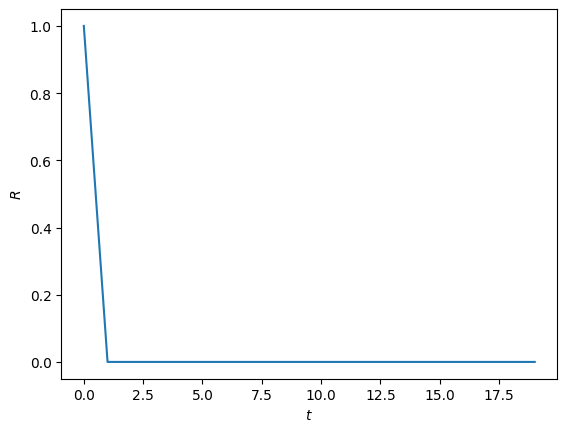

In [77]:
plt.plot(listT,listR)
plt.xlabel('$t$')
plt.ylabel('$R$')
print(listR)

In [59]:
print(G.nodes(data=True))
print(G.edges(data=True))

[(0, {'active': 1}), (1, {'active': 1}), (2, {'active': 0})]
[(0, 1, {'weight': -1}), (0, 2, {'weight': 1}), (1, 0, {'weight': -1}), (1, 2, {'weight': 1}), (2, 0, {'weight': 1}), (2, 1, {'weight': 1})]


In [78]:
listR = []
G = nx.fast_gnp_random_graph(3,1,directed=True)

for i in range(100):
    nx.set_node_attributes(G,{n: {"active": True} for n in G.nodes})
    nx.set_edge_attributes(G, {e: {'weight': np.random.choice([-1,1])} for e in G.edges})
    
    r1 = 0
    r2 = 1
    r3 = 2
    t=0
    while not(r1 == r2 and r2 == r3) or (t<100):  
        updateGraphNew(G)
        r1 = r2
        r2 = r3
        r3= ratioActive(G,4)
        t+=1
    if t == 1000 and (r2!=r3 or r1!=r3):
        nx.draw(G)
        print(i,r1,r2,r3)
        print(G.nodes(data=True))
        print(G.edges(data=True))
        break
    else:
        listR.append(r3)
print("done!")

    

KeyboardInterrupt: 

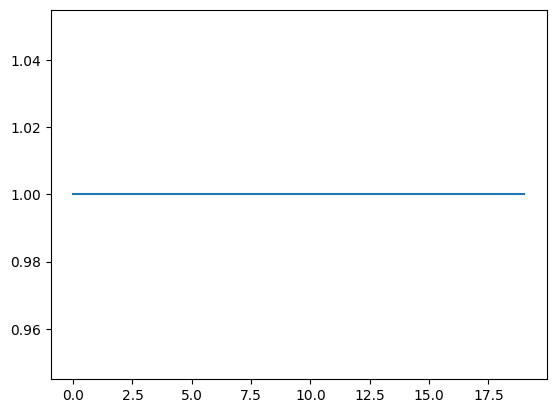

In [8]:
nx.set_node_attributes(G,{n: {"active": True} for n in G.nodes})
listR = []
for t in range(20):
    updateGraph(G)
    listR.append(ratioActive(G,3))
plt.plot(listR)

In [ ]:
listR = []
N = 10
c = 10
G = nx.fast_gnp_random_graph(N,c/N,directed=True)

for i in range(100):
    nx.set_node_attributes(G,{n: {"active": True} for n in G.nodes})
    nx.set_edge_attributes(G, {e: {'weight': np.random.choice([-1,1])} for e in G.edges})
    
    r1 = 0
    r2 = 1
    r3 = 2
    while not(r1 == r2 and r2 == r3):  
        updateGraph(G)
        r1 = r2
        r2 = r3
        r3= ratioActive(G,N)
    listR.append(r3)
    print(i)
    
plt.plot(listR)